In [26]:
import numpy as np
import pandas as pd

In [2]:
airline_rating=pd.read_csv("C:/Users/hp/Desktop/DCU/CLOUD TECHNOLOGIES/ASGNS/ASGN2/DATASET/Preprocessed/cleanedairlines_4dec.csv")

In [3]:
airline_rating.head()

,airline_name,date,cabin_flown,overall_rating,recommended
0,adria-airways,10/04/2015,Economy,7,1
1,adria-airways,05/01/2015,Business Class,10,1
2,adria-airways,14/09/2014,Economy,9,1
3,adria-airways,06/09/2014,Business Class,8,1
4,adria-airways,16/06/2014,Economy,4,0


In [4]:
airline_rating.groupby('airline_name')['overall_rating'].mean().head()

airline_name
adria-airways                7.290323
aegean-airlines              7.462185
aer-lingus                   6.711538
aerocaribbean                8.000000
aeroflot-russian-airlines    6.411290
Name: overall_rating, dtype: float64

In [5]:
airline_rating.groupby('airline_name')['overall_rating'].count().sort_values(ascending=False).head()

airline_name
british-airways     899
united-airlines     839
air-canada-rouge    715
emirates            691
ryanair             658
Name: overall_rating, dtype: int64

In [7]:
rating_mean_count=pd.DataFrame(airline_rating.groupby('airline_name')['overall_rating'].mean())

In [8]:
rating_mean_count['rating_counts']=pd.DataFrame(airline_rating.groupby('airline_name')['overall_rating'].count())

In [9]:
rating_mean_count.head()

,overall_rating,rating_counts
airline_name,,
adria-airways,7.290323,31
aegean-airlines,7.462185,238
aer-lingus,6.711538,416
aerocaribbean,8.000000,1
aeroflot-russian-airlines,6.411290,248


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

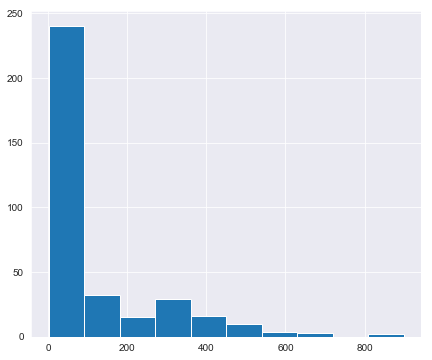

In [11]:
plt.figure(figsize=(7,6))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_count['rating_counts'].hist(bins=10)

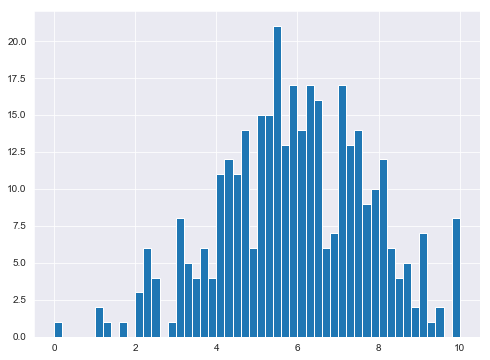

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_count['overall_rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

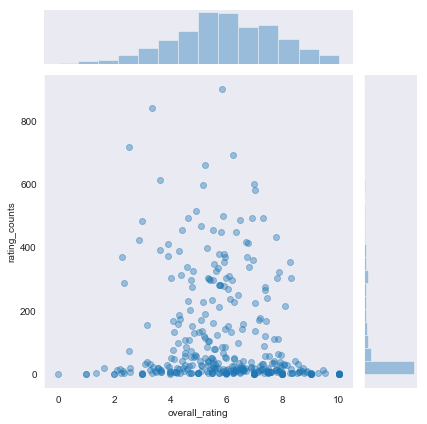

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='overall_rating', y='rating_counts', data=rating_mean_count, alpha=0.4)

In [14]:
user_airline_rating=airline_rating.pivot_table(index='cabin_flown',columns='airline_name', values='overall_rating')

In [15]:
user_airline_rating

airline_name,adria-airways,aegean-airlines,aer-lingus,aerocaribbean,aeroflot-russian-airlines,aerogal-aerolineas-galapagos,aerolineas-argentinas,aeromexico,aerosur,afriqiyah-airways,...,vueling-airlines,westjet,wideroe,wizz-air,wow-air,xiamen-airlines,xl-airways-france,yakutia-airlines,yangon-airways,yemenia
cabin_flown,,,,,,,,,,,,,,,,,,,,,
Business Class,8.428571,7.346154,8.111111,NaN,7.647059,6.666667,4.920000,4.968750,NaN,7.000,...,4.333333,NaN,NaN,NaN,NaN,7.000,NaN,NaN,NaN,NaN
Economy,6.958333,7.476415,6.541779,8.0,6.180095,5.800000,4.215278,5.138614,4.0,5.625,...,4.030201,4.623188,9.5,4.761905,7.258065,6.875,4.967742,6.0,8.5,5.222222
First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,3.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
Premium Economy,NaN,NaN,NaN,NaN,8.666667,NaN,6.000000,9.500000,NaN,NaN,...,1.000000,8.000000,NaN,NaN,NaN,NaN,7.333333,NaN,NaN,NaN


In [16]:
british_rating=user_airline_rating['british-airways']

In [17]:
british_rating.head()

cabin_flown
Business Class     5.925501
Economy            5.614796
First Class        6.841270
Premium Economy    5.947368
Name: british-airways, dtype: float64

In [20]:
airlines_like_british=user_airline_rating.corrwith(british_rating)

In [21]:
corr_british=pd.DataFrame(airlines_like_british,columns=['Correlation'])
corr_british.dropna(inplace=True)
corr_british.head()

,Correlation
airline_name,
adria-airways,1.000000
aegean-airlines,-1.000000
aer-lingus,1.000000
aeroflot-russian-airlines,0.935442
aerogal-aerolineas-galapagos,1.000000


In [22]:
corr_british=corr_british.join(rating_mean_count['rating_counts'])

In [23]:
corr_british.head()

,Correlation,rating_counts
airline_name,,
adria-airways,1.000000,31
aegean-airlines,-1.000000,238
aer-lingus,1.000000,416
aeroflot-russian-airlines,0.935442,248
aerogal-aerolineas-galapagos,1.000000,13


In [24]:
airline_rating.groupby('airline_name')['overall_rating'].count().sort_values(ascending=False).mean()

109.74358974358974

In [25]:
corr_british[corr_british['rating_counts']>500].sort_values('Correlation',ascending=False)

,Correlation,rating_counts
airline_name,,
british-airways,1.000000,899
lufthansa,0.964044,600
ryanair,0.936298,658
jet-airways,0.878874,595
air-canada-rouge,0.873304,715
etihad-airways,0.829646,515
american-airlines,0.815633,612
united-airlines,0.585961,839
qantas-airways,0.332205,580
